# Final Project - OneTwoTrip 

In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data using pandas and split the data frame into X (inputs) and y (outputs). 

In [2]:
df_train = pd.read_csv('onetwotrip_challenge_train.csv')
df_test = pd.read_csv('onetwotrip_challenge_test.csv')

In [99]:
X_train = pd.DataFrame.copy(df_train)
X_train.drop(columns = 'goal1', inplace = True)
y_train = pd.DataFrame.copy(df_train.goal1)

X_test = pd.DataFrame.copy(df_test)

In [4]:
X_train

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,1,0,1,1,0,1,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,1,0,1,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,1,0,1,1,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,1,0,1,1,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,...,1,1,0,1,0,0,0,0,0,0
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,...,1,1,0,0,0,0,0,0,0,0
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,...,1,1,1,1,1,0,0,0,0,0
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,11,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,0


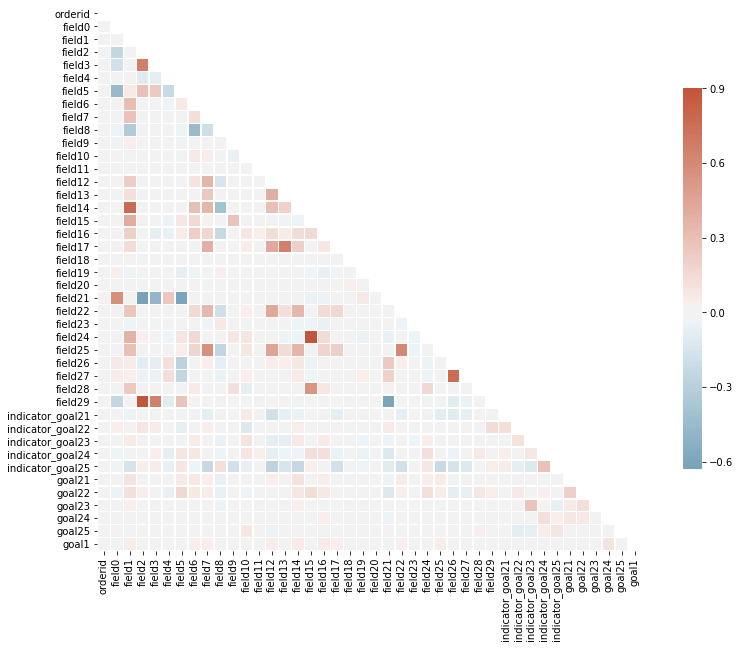

In [5]:
# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

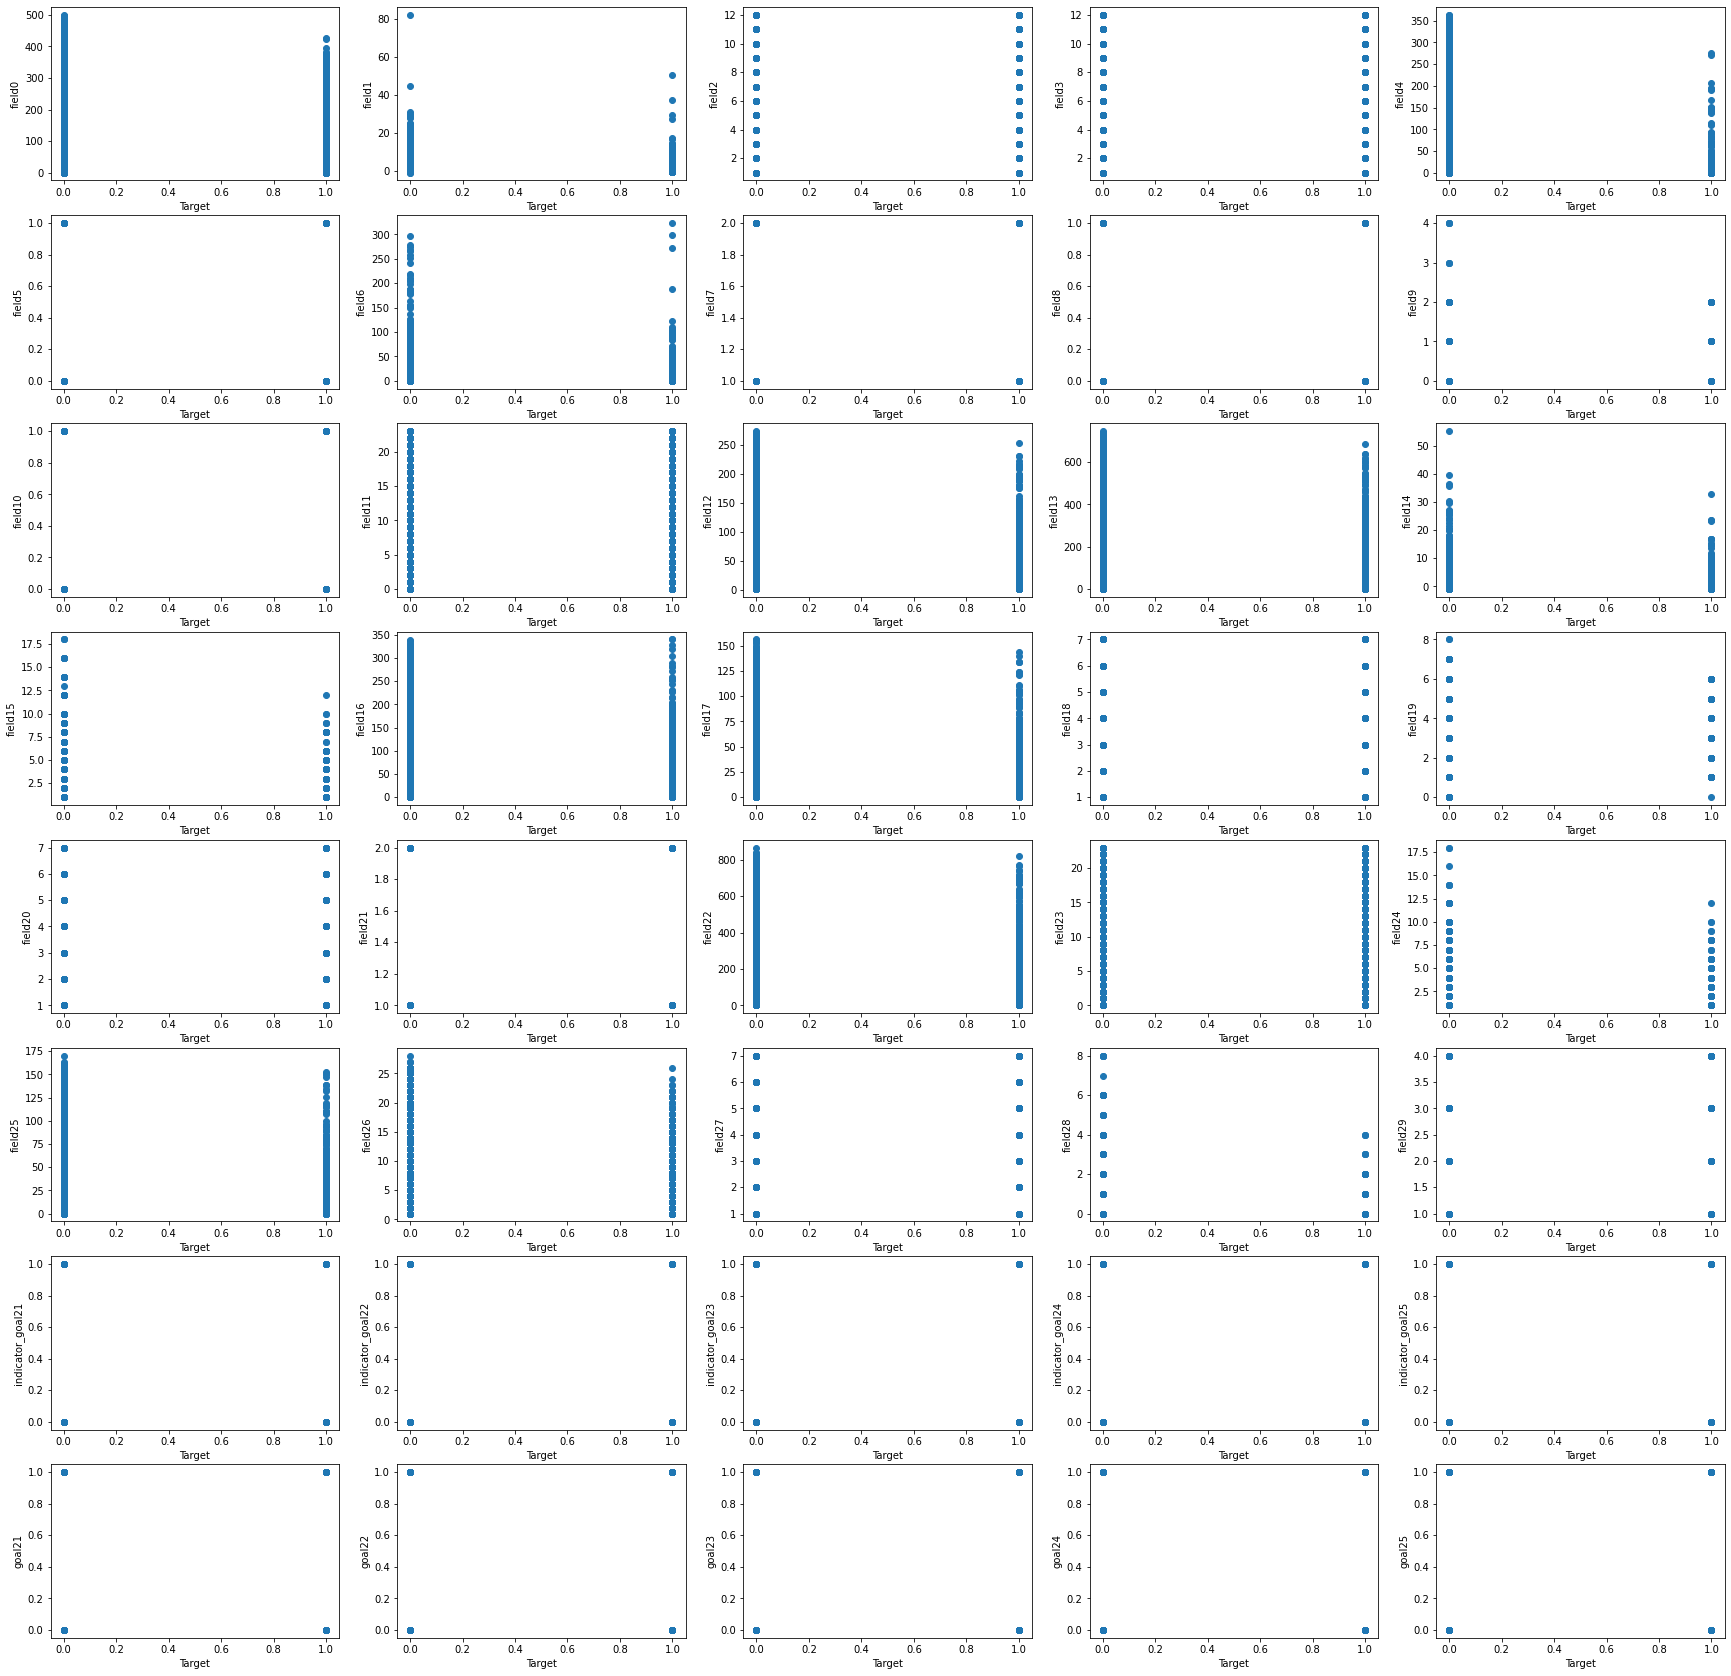

In [70]:
columns = df_train.columns.tolist()
columns.remove('userid')
columns.remove('orderid')
columns.remove('goal1')

fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(30, 30))
for i in range(len(columns)):
    y = i % 5
    x = i // 5 
    axes[x, y].scatter(df_train.goal1, df_train[columns[i]])
    axes[x, y].set_xlabel('Target')
    axes[x, y].set_ylabel(columns[i])
plt.show()

Let's found categorical features 

In [100]:
for column in X_train.columns:
    print(f'{column} {X_train[column].nunique()}')

orderid 196056
userid 113902
field0 486
field1 244
field2 12
field3 12
field4 363
field5 2
field6 147
field7 2
field8 2
field9 5
field10 2
field11 24
field12 270
field13 698
field14 149
field15 15
field16 310
field17 155
field18 7
field19 9
field20 7
field21 2
field22 812
field23 24
field24 14
field25 164
field26 28
field27 7
field28 9
field29 4
indicator_goal21 2
indicator_goal22 2
indicator_goal23 2
indicator_goal24 2
indicator_goal25 2
goal21 2
goal22 2
goal23 2
goal24 2
goal25 2


In [101]:
#field2 and filed3 are probavly months
#field18, field20 and field27 are probavly days of week

In [102]:
for column in X_train.columns:
    if X_train[column].nunique() == 2:
        print(f'{column} {set(X_train[column].values)}')

field5 {0, 1}
field7 {1, 2}
field8 {0, 1}
field10 {0, 1}
field21 {1, 2}
indicator_goal21 {0, 1}
indicator_goal22 {0, 1}
indicator_goal23 {0, 1}
indicator_goal24 {0, 1}
indicator_goal25 {0, 1}
goal21 {0, 1}
goal22 {0, 1}
goal23 {0, 1}
goal24 {0, 1}
goal25 {0, 1}


In [103]:
for column in ['field21', 'field7']:
    X_train[column] = X_train[column].apply(lambda x: 0 if x == 2 else x)

In [104]:
for column in X_train.columns:
    if X_train[column].nunique() == 2:
        print(f'{column} {set(X_train[column].values)}')

field5 {0, 1}
field7 {0, 1}
field8 {0, 1}
field10 {0, 1}
field21 {0, 1}
indicator_goal21 {0, 1}
indicator_goal22 {0, 1}
indicator_goal23 {0, 1}
indicator_goal24 {0, 1}
indicator_goal25 {0, 1}
goal21 {0, 1}
goal22 {0, 1}
goal23 {0, 1}
goal24 {0, 1}
goal25 {0, 1}


### Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. 

In [105]:
#There is no missing variables

In [106]:
X_train.isna().sum().sum()

0

In [107]:
X_test.isna().sum().sum()

0

In [108]:
float_features = ['field1', 'field14']

In [109]:
X_train[float_features].describe()

,field1,field14
count,196056.000000,196056.000000
mean,0.000912,0.001822
std,1.009651,1.007327
min,-0.859222,-0.941441
25%,-0.471365,-0.521242
50%,-0.238651,-0.241109
75%,0.149205,0.179090
max,82.142134,55.225183


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[float_features])

X_train[float_features] = scaler.transform(X_train[float_features])

In [111]:
X_train[float_features].describe()

,field1,field14
count,196056.000000,196056.000000
mean,0.010363,0.016794
std,0.012164,0.017935
min,0.000000,0.000000
25%,0.004673,0.007481
50%,0.007477,0.012469
75%,0.012150,0.019950
max,1.000000,1.000000


We are expecting hist from Misha pidor and then we apply MinMaxScaler for numerical and OneHotEncoder for categorical

In [112]:
features_to_drop_train = ["field0", "field4", "field6", "field12","field13","field17","field19","field22","field25",
"field26","field27","field28","indicator_goal21","indicator_goal22","indicator_goal23",
"goal23","goal25"]

features_to_drop_test = ["field0", "field4", "field6", "field12","field13","field17","field19","field22","field25",
"field26","field27","field28","indicator_goal21","indicator_goal22","indicator_goal23"]

X_train.drop(features_to_drop_train, inplace=True, axis=1)

X_train['field9'] = X_train['field9'].apply(lambda x: not x)

for column in ["field15","field24"]:
    X_train[column] = X_train[column].apply(lambda x: 6 if x > 5 else x)

    X_train['field16'] = X_train['field16'].apply(lambda x: 1 if x < 15 else 0)

    X_train['field18'] = X_train['field18'].apply(lambda x: 1 if x in [6,7] else 0)

    X_train['field20'] = X_train['field20'].apply(lambda x: 1 if x in [4,5,6] else 0)

cat_features = ['field2', 'field3', 'field11', 'field23', 'field15', 'field24', 'field29']

In [113]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(X_train[cat_features]))

In [114]:
dummy_cols_names = []
for i in range(len(cat_features)):
    tmp = [f'{cat_features[i]}_{cat}' for cat in ohe.categories_[i]]
    dummy_cols_names += tmp

In [115]:
encoded_features.columns = dummy_cols_names

In [116]:
encoded_features.set_index(X_train.index, inplace = True)

In [117]:
X_train.drop(cat_features, axis=1, inplace=True)

In [118]:
X_train = pd.concat([X_train, encoded_features], axis=1)

In [122]:
X_train.drop(columns = 'userid', inplace = True)
X_test.drop(columns = 'userid', inplace = True)

In [54]:
#Unbalanced train set

In [53]:
y_train.value_counts()

0    191715
1      4341
Name: goal1, dtype: int64

In [ ]:
n_fold = 5
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)

In [126]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):

#         X_train, X_valid = X.loc[train_index], X.loc[valid_index]
#         y_train, y_valid = y[train_index], y[valid_index]
        
#         y_pred_valid = model.predict(X_valid_sparse)
#         y_pred = model.predict(X_test_sparse, num_iteration=model.best_iteration)

#         scores.append(roc_auc_score(y_valid, y_pred_valid))
    
#model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
clf = XGBClassifier()

grid = {
    
    'n_estimators': [5]
}

xgb_gs = GridSearchCV(clf, param_grid=grid, cv=cv)
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=No...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
  

In [136]:
xgb_gs.best_score_

0.9778430652466642

In [170]:
import random
batch_ind_0 = random.choices(df_train[df_train.goal1 == 0].index, k = y_train.sum())
batch_ind_1 = df_train[df_train.goal1 == 1].index
batch_ind = [*batch_ind_0, *batch_ind_1]

In [174]:
batch_train = X_train[X_train.index.isin(batch_ind)]
y_train_ = df_train[df_train.index.isin(batch_ind)].goal1

In [181]:
model = XGBClassifier(max_depth=6, learning_rate=0.007, n_estimators=3000, reg_lambda=5.5, reg_alpha=1.2)
model.fit(batch_train, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1.2,
              reg_lambda=5.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [182]:
y_pred = model.predict(batch_train)

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_, y_pred)

0.7876157407407407

In [184]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_, y_pred)

array([[3487,  812],
       [1023, 3318]])

In [188]:
import xgboost.sklearn as xgb

param_dist = {'max_depth':6, 'learning_rate':0.007, 'n_estimators':3000, 'reg_lambda':5.5, 'reg_alpha':1.2}

clf = xgb.XGBModel(**param_dist)

clf.fit(X_train, y_train,
eval_set=[(X_train, y_train)],
eval_metric='auc',
verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-auc:0.62174
[1]	validation_0-auc:0.62174
[2]	validation_0-auc:0.62202
[3]	validation_0-auc:0.62207
[4]	validation_0-auc:0.62207
[5]	validation_0-auc:0.62207
[6]	validation_0-auc:0.62207
[7]	validation_0-auc:0.62207
[8]	validation_0-auc:0.62207
[9]	validation_0-auc:0.62207
[10]	validation_0-auc:0.62207
[11]	validation_0-auc:0.62207
[12]	validation_0-auc:0.62216
[13]	validation_0-auc:0.64502
[14]	validation_0-auc:0.64502
[15]	validation_0-auc:0.64502
[16]	validation_0-auc:0.64502
[17]	validation_0-auc:0.64503
[18]	validation_0-auc:0.64503
[19]	validation_0-auc:0.64504
[20]	validation_0-auc:0.64511
[21]	validation_0-auc:0.64982
[22]	validation_0-auc:0.64984
[23]	validation_0-auc:0.64985
[24]	validation_0-auc:0.65698
[25]	validation_0-auc:0.65677
[26]	validation_0-auc:0.65677
[27]	validation_0-auc:0.65677
[28]	validation_0-auc:0.65677
[29]	validation_0-auc:0.65677
[30]	validation_0-auc:0.65677
[31]	validation_0-auc:0.65683
[32]	validation_0-auc:0.65683
[33]	validation_0-au

[268]	validation_0-auc:0.68873
[269]	validation_0-auc:0.68885
[270]	validation_0-auc:0.68890
[271]	validation_0-auc:0.68899
[272]	validation_0-auc:0.68906
[273]	validation_0-auc:0.68913
[274]	validation_0-auc:0.68923
[275]	validation_0-auc:0.68929
[276]	validation_0-auc:0.68948
[277]	validation_0-auc:0.68958
[278]	validation_0-auc:0.68962
[279]	validation_0-auc:0.68979
[280]	validation_0-auc:0.68982
[281]	validation_0-auc:0.68990
[282]	validation_0-auc:0.68997
[283]	validation_0-auc:0.69002
[284]	validation_0-auc:0.69014
[285]	validation_0-auc:0.69021
[286]	validation_0-auc:0.69036
[287]	validation_0-auc:0.69040
[288]	validation_0-auc:0.69052
[289]	validation_0-auc:0.69059
[290]	validation_0-auc:0.69070
[291]	validation_0-auc:0.69076
[292]	validation_0-auc:0.69086
[293]	validation_0-auc:0.69096
[294]	validation_0-auc:0.69108
[295]	validation_0-auc:0.69116
[296]	validation_0-auc:0.69129
[297]	validation_0-auc:0.69138
[298]	validation_0-auc:0.69143
[299]	validation_0-auc:0.69154
[300]	va

[533]	validation_0-auc:0.71589
[534]	validation_0-auc:0.71600
[535]	validation_0-auc:0.71605
[536]	validation_0-auc:0.71621
[537]	validation_0-auc:0.71628
[538]	validation_0-auc:0.71634
[539]	validation_0-auc:0.71641
[540]	validation_0-auc:0.71645
[541]	validation_0-auc:0.71662
[542]	validation_0-auc:0.71668
[543]	validation_0-auc:0.71675
[544]	validation_0-auc:0.71692
[545]	validation_0-auc:0.71696
[546]	validation_0-auc:0.71705
[547]	validation_0-auc:0.71719
[548]	validation_0-auc:0.71723
[549]	validation_0-auc:0.71732
[550]	validation_0-auc:0.71739
[551]	validation_0-auc:0.71746
[552]	validation_0-auc:0.71764
[553]	validation_0-auc:0.71769
[554]	validation_0-auc:0.71781
[555]	validation_0-auc:0.71790
[556]	validation_0-auc:0.71794
[557]	validation_0-auc:0.71806
[558]	validation_0-auc:0.71814
[559]	validation_0-auc:0.71826
[560]	validation_0-auc:0.71829
[561]	validation_0-auc:0.71844
[562]	validation_0-auc:0.71851
[563]	validation_0-auc:0.71862
[564]	validation_0-auc:0.71865
[565]	va

KeyboardInterrupt: 